### Goal
<ol>
    <li> Learn to use different packages such as scipy </li>
    <li> Learn to work with different probability distributions </li>
    <ul>
        <li> Normal distribution </li>
        <li> Poisson distribution</li>
        <li>Multivariate normal distribution</li> 
    </ul>
    <li> Sampling from probability distributions</li>
    <li> Fitting probability distribution to data </li>
    <li> Seaborn plotting library to plot </li>
</ol>


In [10]:
# Sources: https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8
# 

# Import math and plotting libraries
import numpy as np                             # mumpy is ....
import scipy.stats as st                       # scipy is ; stats is statistical
import scipy.special
import matplotlib.pyplot as plt                # matplotlib is ...; pyplot is
from IPython.core.display import Math, Latex   # for latex equations
from IPython.core.display import Image         # for displaying images
import seaborn as sns                          # seaborn is...
sns.set(color_codes=True)                      # Settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)})           # Settings for seaborn plot sizes 



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

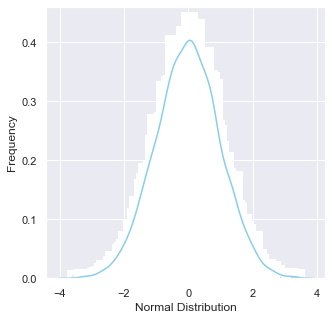

In [11]:
#1. Normal distribution
from scipy.stats import norm

n = 10000; mu = 0; sd = 1;                     # Define N(0,1) as normal distribution with mean=0 and standard deviation=1.
data_normal = norm.rvs(size=n,loc=mu,scale=sd) # Generate random numbers from N(0,1)
ax = sns.distplot(data_normal, 
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth":15,'alpha':1})
ax.set(xlabel='Normal Distribution',ylabel='Frequency')
#Figure

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

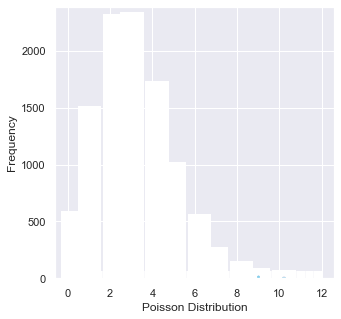

In [12]:
#2. Poisson distribution
from scipy.stats import poisson
mu=3;
data_poisson = poisson.rvs(mu=mu,size=n)
#Figure
ax = sns.distplot(data_poisson, 
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth":15,'alpha':1})
ax.set(xlabel='Poisson Distribution',ylabel='Frequency')


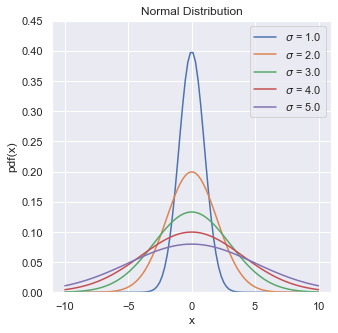

In [27]:
# generate a set of normal curves

x = np.linspace(-10, 10, 100)
sds = [1, 2, 3, 4, 5]

fig, ax = plt.subplots()

for s in sds:
    ax.plot(x, norm.pdf(x, scale = s), label = '$\sigma$ = %.1f' % s)
    
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    ax.set_title('Normal Distribution')
    ax.legend(loc='best', frameon=True)
    ax.set_ylim(0,0.45)
    ax.grid(True)
    


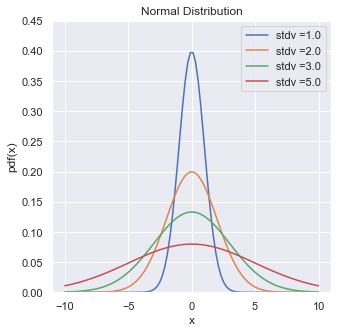

In [13]:
# Compare multiple normal distributions with different standard deviations
fig, ax = plt.subplots()
x = np.linspace(-10,10,100) 
sds = [1.0, 2.0, 3.0, 5.0]

for s in sds:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv =%.1f' % s)
    
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    ax.set_title('Normal Distribution')
    ax.legend(loc='best', frameon=True)
    ax.set_ylim(0,0.45)
    ax.grid(True)

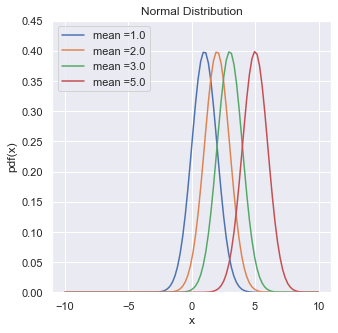

In [14]:
# Normal distributions with different means
fig, ax = plt.subplots()
x = np.linspace(-10,10,100) 
means = [1.0, 2.0, 3.0, 5.0]

for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean =%.1f' % mean)
    
    ax.set_xlabel('x')
    ax.set_ylabel('pdf(x)')
    ax.set_title('Normal Distribution')
    ax.legend(loc='best', frameon=True)
    ax.set_ylim(0,0.45)
    ax.grid(True)

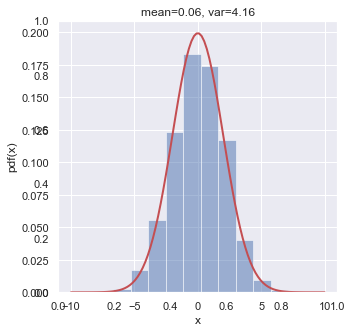

In [15]:
# norm.rvs generates random normal distribution numbers, 
# while norm.pdf generates probability density function for the normal distributions
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)


In [16]:
# Calculating probabilities from normal distribution
# Q. Find P(X<2) for X~N(3,2^2)
Xs=2; mu=3; sdv=2;
p_lessThanXs=norm.cdf(x=Xs,loc=mu,scale=sdv)
print(p_lessThanXs)

0.3085375387259869


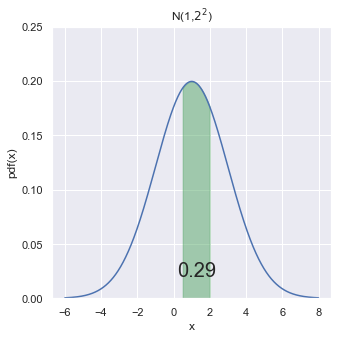

In [17]:
# Q. Find P(0.5<X<2) for X~N(1,2^2) and show it over the normal plot
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

In [18]:
# Confidence Intervals around the mean
#Q. Find the X-endpoints of the 95% confidence interval for N(0,1)
a,b = norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

-1.959963984540054 1.959963984540054


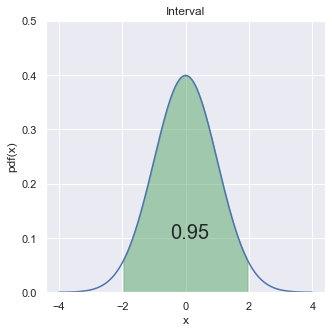

In [19]:
#Figure
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()

Text(0.5, 1.0, 'pdf')

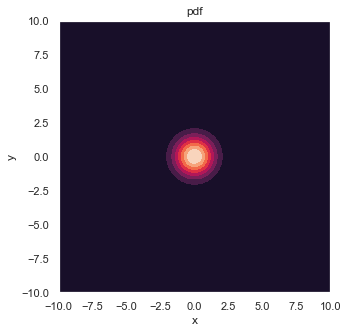

In [44]:
# Multivariate Normal Distribution
# The multivariate normal distribution is often used to describe any set of correlated real-valued random variables.
# We use multivariate_normal which requires the array of mean and covariance matrix. 
# To make it simple, we use a diagonal matrix in which all off-diagonal elements are zero.
from scipy.stats import multivariate_normal  #

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))

mean = np.array([0, 0])
cov  = np.array([[1,0],[0,1]])  # diagonal elements are the variances of each element, the off diagonal elements are the variances between vectors

rv = multivariate_normal(mean,cov)
z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')

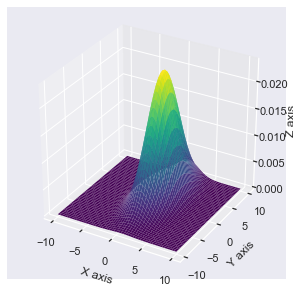

In [21]:
# 3D plot
#We can create a 3D graph using matplotlib’s mpl_toolkits.mplot3d.Axes3D. We also use Scipy frozen RV object.
from mpl_toolkits.mplot3d import Axes3D

# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
# Create a frozen RV object
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

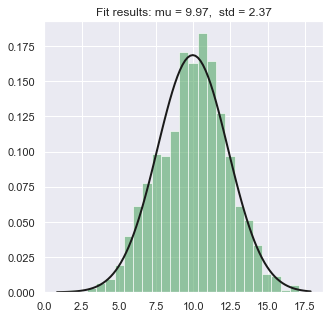

In [22]:
# Fitting normal distribution to a given data
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=1000)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()